I) Abstract:

Asuncion ha crecido exponencialmente durante los ultimos años, algo que me di cuenta fue el aumento exponencial que tuvieron los terrenos en en la ciudad y siempre me preguntaba si yo realmente podria comprarme una casa en Asuncion cuando sea grande, sin embargo no pude encontrar un Data set representativo de la evolucion de asuncion en cuanto a las viviendas. Es por esto que decidi buscar en otra parte del mundo y salio California un estado muy parecido a Asuncion en cunato a su aumeto masivo de precio a la hora de comprar una vivienda.

II) Objetivo: 

Este estudio se basa en un conjunto de datos que recopila información sobre los precios de las viviendas en diferentes regiones de California. El objetivo principal de este análisis es desentrañar los factores clave que influyen en los precios de las viviendas y proporcionar información valiosa para compradores, vendedores y profesionales del sector inmobiliario y tambien lograr predecir el futuro de las viviendas en california para generar conciencia a la juventud respecto al mercado inmobiliario.

El conjunto de datos incluye una amplia gama de características, como la ubicación geográfica, el numero de habitaciones, el ingreso promedio,proximidad al oceano, edad de las viviendas, longitud y latidud del estado de California, poblacion y más. Se llevará a cabo un proceso exhaustivo de limpieza y preprocesamiento de datos para garantizar que los datos sean confiables y coherentes. Esta investigacion se estara guiando de las preguntas de investgacion y tambien de hipotesis planteadas.

III) Preguntas e Hipotesis:

1. ¿Tiene la ubicacion geografica un impacto significativo en los precios de las viviendas en California?
2. ¿Existe una relación lineal entre los ingresos promedios y el precio de las viviendas promedio?
3. ¿Podran los asalariados promedios comprarse una casa en futuro?

IV) Contexto Comercial:

En el mercado inmobiliario, tanto compradores como vendedores necesitan una estimación precisa del precio de las propiedades. Los compradores desean saber cuánto deberían estar dispuestos a pagar por una casa, mientras que los vendedores quieren establecer un precio que atraiga a los compradores y les permita obtener un buen retorno de su inversión. Los agentes inmobiliarios también pueden beneficiarse de herramientas que les ayuden a fijar precios competitivos y brindar asesoramiento a sus clientes.

V) Problema Comercial:

El problema comercial asociado al conjunto de datos "Housing Prices in California" es la predicción de los precios de las viviendas en California basándose en varias características o atributos relacionados con esas viviendas. El objetivo es desarrollar un modelo de regresión capaz de predecir el precio de una vivienda en función de factores como el número de habitaciones, el ingreso promedio de la zona, la ubicación geográfica, la población, la proximidad al océano, etc.

La importancia de este problema comercial radica en su aplicabilidad en el mundo real, ya que tanto los compradores como los vendedores de propiedades pueden beneficiarse de estimaciones precisas de precios. Además, este tipo de modelo es esencial para agentes inmobiliarios y empresas relacionadas con bienes raíces que desean tomar decisiones informadas sobre precios y estrategias de mercado.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
casas = pd.read_csv('housing.csv')
casas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
casas['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
casas.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


VI) Analisis EDA: Comprender la naturaleza de los datos, identificar patrones, tendencias, anomalías y relaciones dentro del conjunto de datos. 

Visualizacion univariada

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

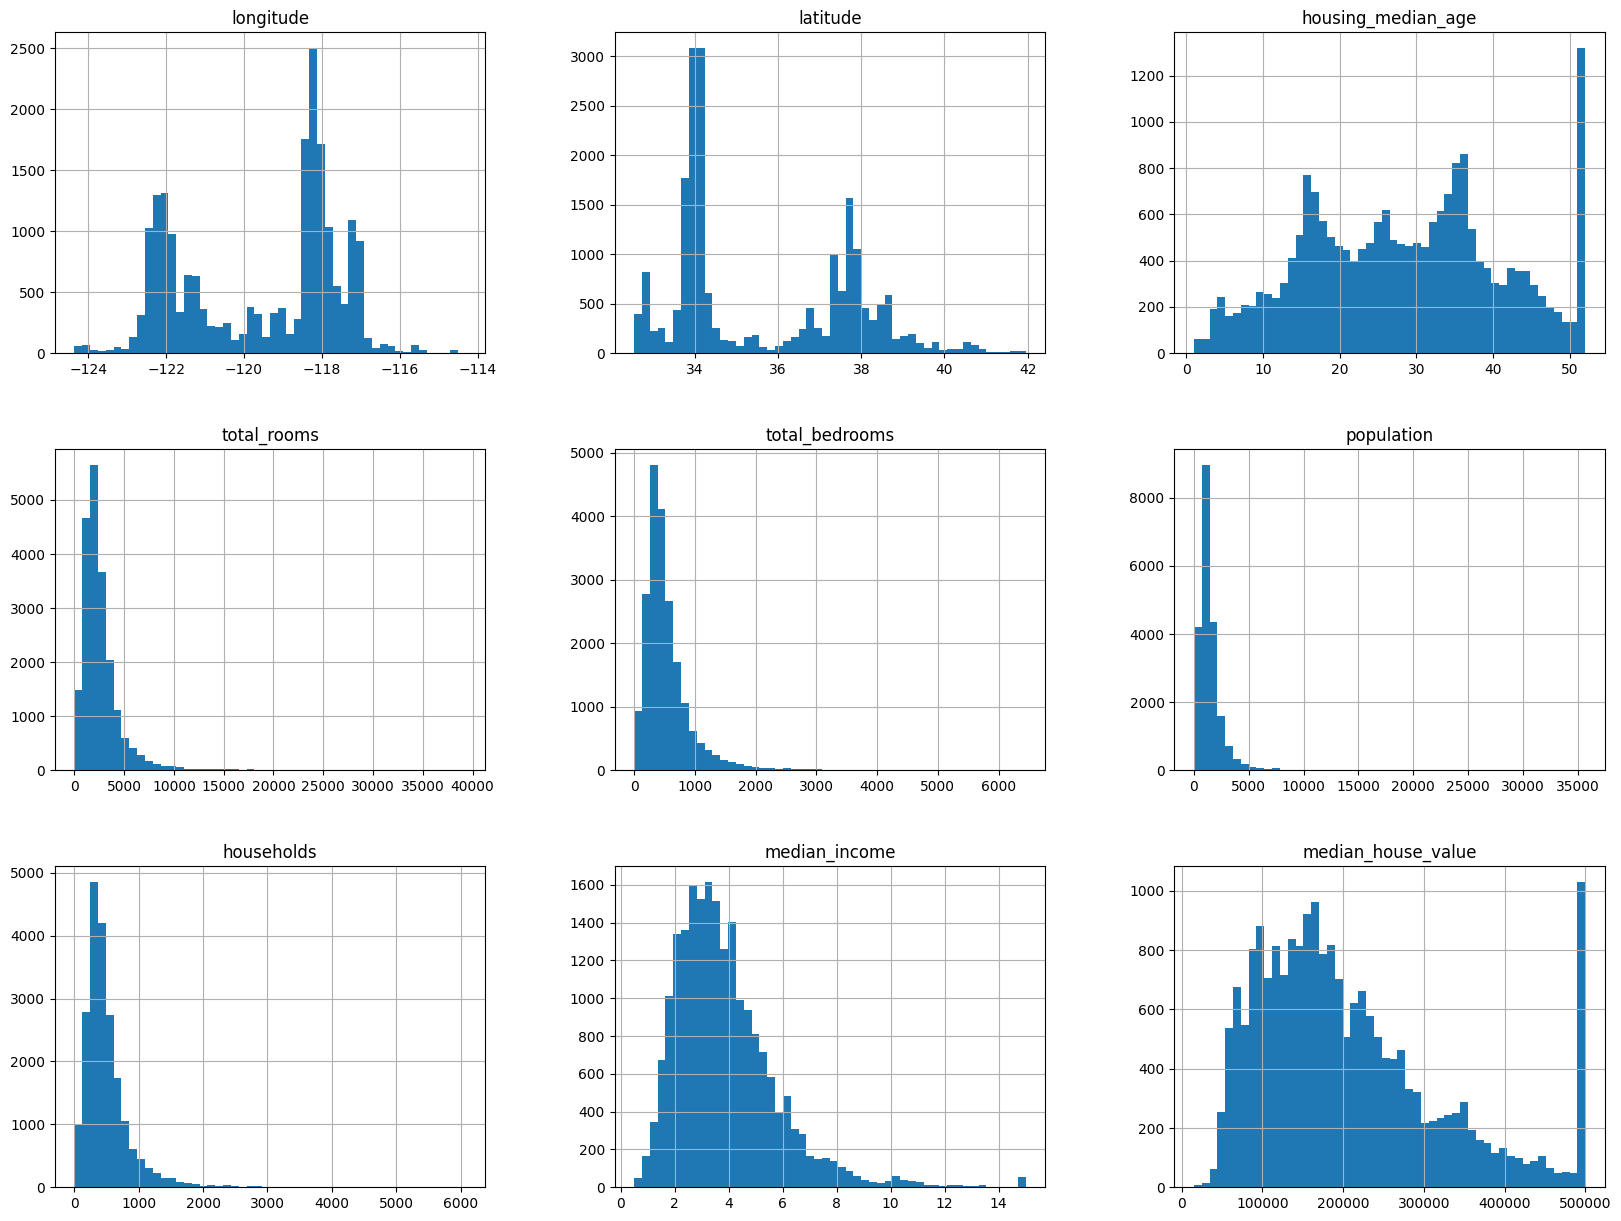

In [6]:

casas.hist(bins=50, figsize=(20,15))
# Algo que llama la atencion de estos graficos ("housing_median_age" y "median_house_value") es que ambos poseen un gran numero de 
# outliers esto puede ser debido a un error a la hora de clasificar al agrupar las casas en una categoria de +50 anhos o casas de +500K
#en esta categoria tambien estarian entrando las cases de mas de +10 millones de dolares, lo que podria explicar la gran diferencia.

<Figure size 1200x400 with 0 Axes>

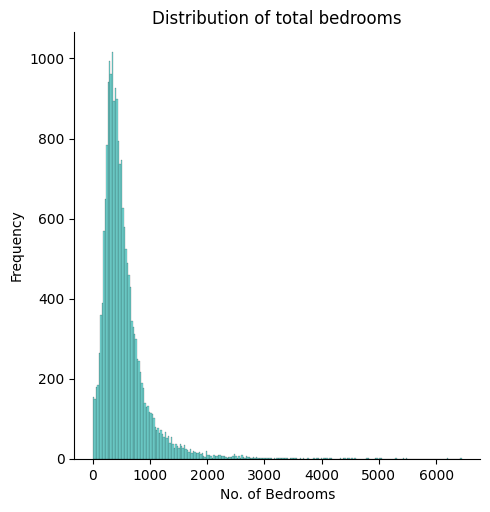

In [7]:
#--Distribution of Total Bedrooms
plt.figure(figsize = (12,4))
sns.displot(x = casas['total_bedrooms'], color = 'mediumturquoise')
plt.title('Distribution of total bedrooms')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x400 with 0 Axes>

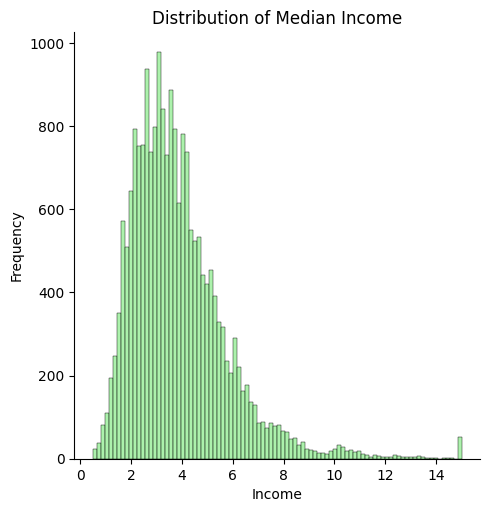

In [8]:
#--Distribution of Median Income
plt.figure(figsize = (12,4))
sns.displot(x = casas['median_income'], color = 'lightgreen')
plt.title('Distribution of Median Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

#Se trata de una distribución sesgada positivamente. El gráfico indica que la mayoría de las personas 
# tienen ingresos dentro del mismo intervalo, con sólo unos pocos que se sitúan en el lado más alejado.

<Axes: xlabel='longitude', ylabel='latitude'>

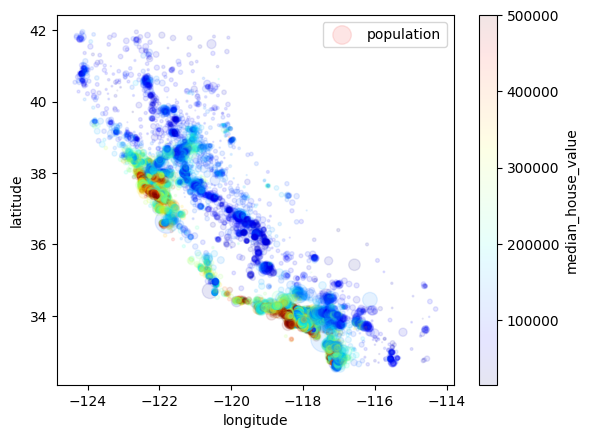

In [9]:
casas.plot(kind='scatter', x='longitude', y='latitude', alpha =0.1,
           s=casas['population']/100, label='population', c='median_house_value', cmap=plt.get_cmap('jet'))
#podemos ver como las puntos que se acercan al rojo implican una mayor poblacion, en este caso se estarian concentrando en la zona costera
#esto podria implicar que las casas cerca del oceano puedan ser mas caras debido a la gran poblacion (civilizacion como: LA o San Francisco)

In [10]:
corr_matrix = casas.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

#mediante esto podemos ver que variables tienen un mayor corrrelacion respecto a la variable de "valor promedio de casa"
#podemos ver que la variable con mayor correlacion es la del salario promedio.

C:\Users\gpost\AppData\Local\Temp\ipykernel_15812\3635136124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = casas.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Visualizacion Multivariada

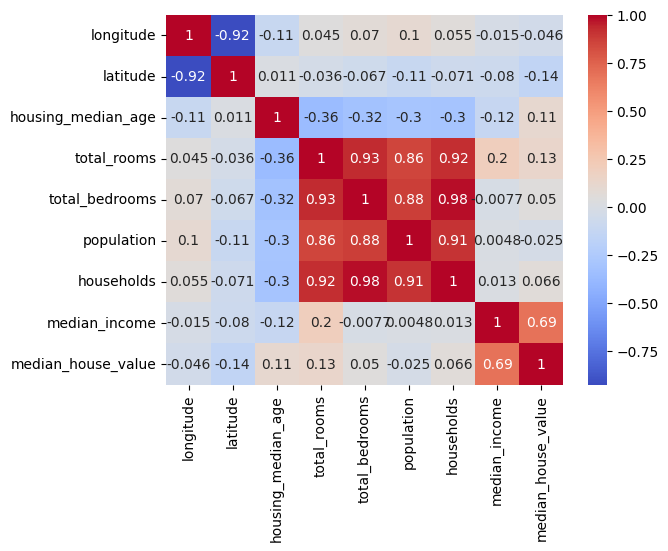

In [11]:
#Creo un mapa de calor para apreciar mejor la correlaciones entre las diferentes variables
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Visualizacion Bivariada

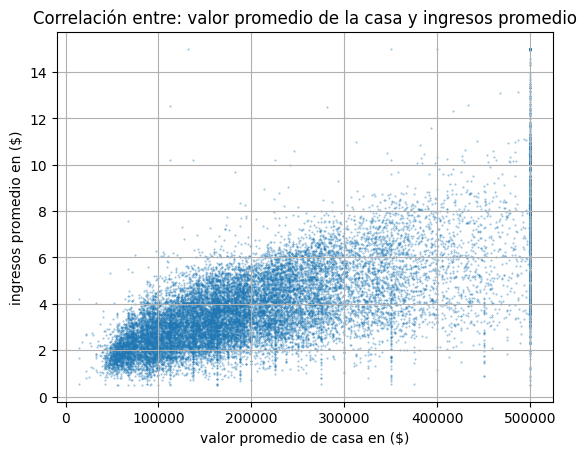

In [12]:
#Pudimos ver como la correlacion entre el "median_income" y "median_house_value" era relativamente fuerte con un valor p de 0.69
#Asi que decidi hacer un grafico de dispercion para analizar mejor las variables, podemos ver como claramente existe una correlacion positiva
#entre ambas variables
plt.scatter(casas['median_house_value'], casas['median_income'], alpha=0.5, s=0.2)
plt.title('Correlación entre: valor promedio de la casa y ingresos promedio')
plt.xlabel('valor promedio de casa en ($)')
plt.ylabel('ingresos promedio en ($)')
plt.grid(True)
plt.show()

In [13]:
#Hago esto para eliminar los valores (ceros) y asi creo una nueva variable
casas_na = casas.dropna(subset=['total_bedrooms'])
casas_na.shape

(20433, 10)

In [14]:
#Creamos "datos ficticios" para la columna de "Ocean Proximity", las variables dummies son una forma de representar categorías
# o grupos en estadística mediante valores numéricos 0 y 1, lo que facilita su uso en análisis estadísticos y modelado.
dummies = pd.get_dummies(casas_na.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [15]:
#Cree una nueva varible que contiene el data set original y los dummies
casas_na_dummies = pd.concat([casas_na, dummies], axis='columns')
casas_na_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [16]:
#Decidi borrar la columna de "ocean_proximity" debido a que no tenia valores numeros, lo cual afectaria a mi modelo y tambien la
# columna "ISLAND" debido a que su valor era de 5.
casas_limpias = casas_na_dummies.drop(['ocean_proximity', 'ISLAND'], axis='columns')
casas_limpias

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0


Feature Selection

El modelo que decidi usar es el de regresion lineal. Las variables independientes (X) son: longitud, latitud, edad_media_vivienda, total_habitaciones, total_dormitorios, población, hogares, renta_media, proximidad_del_océano. La columna valor_medio_vivienda representa la variable que deseamos predecir, por lo que es la variable dependiente (Y).

El objetivo de un modelo de regresión lineal es estimar los valores de la pendiente y el intercepto que mejor se ajustan a los puntos de datos observados. Esto se hace minimizando la diferencia entre los valores predichos de Y y los valores reales de Y para un X dado.

Una vez estimados la pendiente y el intercepto, la recta de regresión puede utilizarse para hacer predicciones sobre los valores de Y para cualquier valor dado de X, que es el objetivo principal de un modelo de regresión lineal. Proporcionar una relación matemática entre X e Y que pueda utilizarse para hacer predicciones sobre los valores de Y para cualquier nuevo valor dado de X.

In [17]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 

In [18]:
X = casas_limpias.drop('median_house_value', axis = 1) #Selección de variables independientes eliminando 
                                                    #la columna 'median_house_value' del data-set
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [19]:
y = casas_limpias['median_house_value'] # selección de la variable dependiente del  data-set
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Dividir las instancias X e y para los conjuntos de entrenamiento y prueba.
                                                   test_size = 0.3) # Se utilizará el 30% de los datos para probar el modelo   
                                                   

In [21]:
lr = LinearRegression() # Inicialización del modelo
lr.fit(X_train, y_train) # Ajuste del modelo a los datos de entrenamiento

y_pred = lr.predict(X_test) # Predicción de precios en el conjunto de prueba
score = r2_score(y_test, y_pred) # Medir el rendimiento del modelo comparando los valores predichos con los valores reales

print('el valor R² es de:', score)

el valor R² es de: 0.6509873871178473


METRICAS del Modelo

El R², o coeficiente de determinación, es una de las métricas más utilizadas para evaluar el rendimiento de un modelo de regresión lineal. Mide la proporción de la varianza de la variable dependiente que explican las variables independientes del modelo. R² oscila entre 0 y 1, y los valores más altos indican un mejor ajuste del modelo a los datos. R² puede interpretarse como el porcentaje de la variación de la variable dependiente que puede atribuirse a las variables independientes incluidas en el modelo. Por lo tanto, un valor de R² elevado sugiere que el modelo se ajusta bien a los datos y puede utilizarse para hacer predicciones precisas. Sin embargo, es importante señalar que un valor de R² elevado no implica necesariamente causalidad o una relación estrecha entre las variables.

Obtuve un valor R² de 0.651, es un valor significativo por lo que el modelo se ajusta bien a los datos y puede utilizarse para hacer predicciones relativamente precisas.

In [22]:
import plotly.express as px
import statsmodels.api as sm

Trazado de ScatterPlot comparando los valores y_test & y_pred con la línea de mejor ajuste

In [23]:

data = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
fig = px.scatter(data, x='y_test', y='y_pred', trendline='ols', trendline_color_override='red')

fig.update_layout(
    title='R² = %0.3f' % score,
    xaxis_title='y_test',
    yaxis_title='y_pred',
    template = 'ggplot2',
    height = 200
)

trendline_results = px.get_trendline_results(fig)
r_squared = trendline_results.iloc[0]['px_fit_results'].params[1]

fig.update_layout(height=1000)
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()
12

con estos resultado podriamos decir que tenemos una situacion de overfitting debido a que la metrica indica un punatje alto de R². Sin embargo para estar mas seguro del overfitting deberia de agregar mas metricas para evaluar mi modelo de regresion lineal.